In [128]:
!pip install keras==2.15.0

In [129]:
import numpy as np
import pandas as pd
import cv2
import PIL
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [130]:
os.listdir()

['.virtual_documents', 'skin_detection.h5']

In [131]:
dataset_url = '/kaggle/input/skin-disease-dataset/skin-disease-datasaet/train_set'

In [132]:
os.listdir(dataset_url)

['FU-nail-fungus',
 'FU-ringworm',
 'VI-shingles',
 'BA-impetigo',
 'FU-athlete-foot',
 'VI-chickenpox',
 'PA-cutaneous-larva-migrans',
 'BA- cellulitis']

In [133]:
dataset_url

'/kaggle/input/skin-disease-dataset/skin-disease-datasaet/train_set'

In [134]:
import pathlib
data_dir=pathlib.Path(dataset_url)
data_dir

PosixPath('/kaggle/input/skin-disease-dataset/skin-disease-datasaet/train_set')

In [135]:
cellulitis=list(data_dir.glob('BA- cellulitis/*'))
len(cellulitis)

136

In [136]:
FU_athlete_foot=list(data_dir.glob('FU-athlete-foot/*'))
len(FU_athlete_foot)

124

In [137]:
VI_chickenpoxt=list(data_dir.glob('VI-chickenpox/*'))
len(VI_chickenpoxt)

136

In [138]:
VI_shingles=list(data_dir.glob('VI-shingles/*'))
len(VI_shingles)

130

In [139]:
FU_nail_fungus=list(data_dir.glob('FU-nail-fungus/*'))
len(FU_nail_fungus)

129

In [140]:
BA_impetigo=list(data_dir.glob('BA-impetigo/*'))
len(BA_impetigo)

80

In [141]:
FU_ringworm=list(data_dir.glob('FU-ringworm/*'))
len(FU_ringworm)

90

In [142]:
PA_cutaneous_larva_migrans=list(data_dir.glob('PA-cutaneous-larva-migrans/*'))
len(PA_cutaneous_larva_migrans)

100

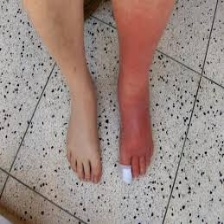

In [143]:
PIL.Image.open(str(cellulitis[6]))

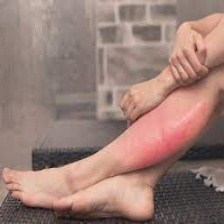

In [144]:
PIL.Image.open(str(cellulitis[16]))

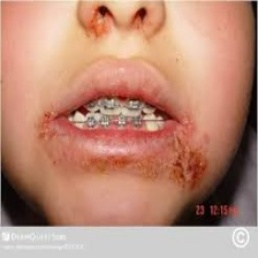

In [145]:
PIL.Image.open(str(BA_impetigo[16]))

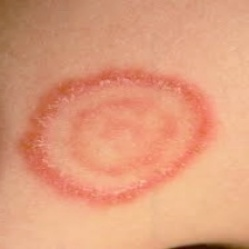

In [146]:
PIL.Image.open(str(FU_ringworm[4]))

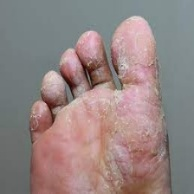

In [147]:
PIL.Image.open(str(FU_athlete_foot[16]))

In [148]:
cv2.imread(str( cellulitis[0])).shape[2]

3

In [149]:
disease_images_train_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
#     'normal':list(data_dir.glob('normal/*')),   
}

In [150]:
disease_train_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
#     'normal':8,
}

In [151]:
x_train = []
y_train = []

for image_name, image_paths in disease_images_train_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_train.append(image_resize)
        y_train.append(disease_train_label_dic[image_name])

In [152]:
x_train[0].shape

(224, 224, 3)

In [153]:
len(disease_images_train_dic['ringworm']),len(disease_images_train_dic['shingles'])

(90, 130)

In [154]:
len(x_train)

925

In [155]:
len(y_train)

925

In [156]:
from sklearn.model_selection import train_test_split

y_train=np.array(y_train)
x_train=np.array(x_train)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

y_train.shape

(832,)

In [157]:
dataset_url='/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set'

In [158]:
import pathlib
data_dir=pathlib.Path(dataset_url)
data_dir

PosixPath('/kaggle/input/skin-disease-dataset/skin-disease-datasaet/test_set')

In [159]:
disease_images_test_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
#     'normal':list(data_dir.glob('test_set/normal/*')),   
}
disease_test_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
#     'normal':8,
}

In [160]:
x_test = []
y_test = []

for image_name, image_paths in disease_images_test_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_test.append(image_resize)
        y_test.append(disease_test_label_dic[image_name])

In [161]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [162]:
x_test.shape

(234, 224, 224, 3)

In [163]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255
x_val_scaled=x_val/255

In [164]:
x_train_scaled[0]

array([[[0.45490196, 0.52941176, 0.87058824],
        [0.48235294, 0.56078431, 0.89803922],
        [0.52156863, 0.6       , 0.92941176],
        ...,
        [0.50588235, 0.57647059, 0.90980392],
        [0.52156863, 0.57647059, 0.89019608],
        [0.57254902, 0.61960784, 0.9254902 ]],

       [[0.50980392, 0.58431373, 0.92156863],
        [0.49803922, 0.57647059, 0.90588235],
        [0.49411765, 0.57254902, 0.90196078],
        ...,
        [0.48235294, 0.55294118, 0.8745098 ],
        [0.50980392, 0.56470588, 0.87058824],
        [0.56078431, 0.61176471, 0.90588235]],

       [[0.54901961, 0.62745098, 0.95686275],
        [0.50588235, 0.58823529, 0.90980392],
        [0.47058824, 0.55686275, 0.8745098 ],
        ...,
        [0.45098039, 0.51764706, 0.82745098],
        [0.49803922, 0.54901961, 0.83921569],
        [0.56078431, 0.60392157, 0.88235294]],

       ...,

       [[0.8       , 0.76470588, 0.72941176],
        [0.8       , 0.76470588, 0.72941176],
        [0.8       , 0

In [165]:
import tensorflow_hub as hub

In [ ]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224, 224, 3),
                                         trainable=False)

In [166]:
x_train_scaled.shape

(832, 224, 224, 3)

In [249]:
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

# Define the input shape
input_shape = (224, 224, 3)

# Create a MobileNetV2 model with pretrained weights
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add a GlobalAveragePooling2D layer to reduce spatial dimensions
x = GlobalAveragePooling2D()(base_model.output)

# Add Dropout for regularization
x = Dropout(0.5)(x)

# Add Dense layers with ReLU activation and L2 regularization
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)

# Add Dropout for regularization
x = Dropout(0.5)(x)

# Add the output layer with softmax activation for multi-class classification
outputs = Dense(9, activation='softmax')(x)

# Create the model
model = keras.Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(
    optimizer=Adam(lr=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    x_train_scaled, 
    y_train, 
    epochs=100, 
    validation_data=(x_val_scaled, y_val), 
    callbacks=[early_stopping, reduce_lr]
)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_21[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [250]:
x_test_scaled.shape

(234, 224, 224, 3)

In [251]:
model.evaluate(x_test_scaled,y_test)
model.evaluate(x_val_scaled, y_val)

3/3 [==============================] - 0s 31ms/step - loss: 0.6331 - accuracy: 0.9677


[0.6330853700637817, 0.9677419066429138]

In [252]:
y_predict=model.predict(x_test_scaled)
# y_predict[0]
y_predicted_labels=[]
for i in y_predict:
    y_predicted_labels.append(np.argmax(i))
    
y_predicted_labels=np.array(y_predicted_labels)

8/8 [==============================] - 1s 27ms/step


In [253]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       1.00      1.00      1.00        20
           2       0.91      0.97      0.94        32
           3       0.97      1.00      0.99        33
           4       0.83      0.87      0.85        23
           5       1.00      0.88      0.94        25
           6       1.00      1.00      1.00        34
           7       1.00      0.91      0.95        33

    accuracy                           0.95       234
   macro avg       0.95      0.95      0.95       234
weighted avg       0.96      0.95      0.95       234



In [254]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(8, 8), dtype=int32, numpy=
array([[33,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0],
       [ 3,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  3,  0,  0, 22,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  3,  0,  0, 30]], dtype=int32)>

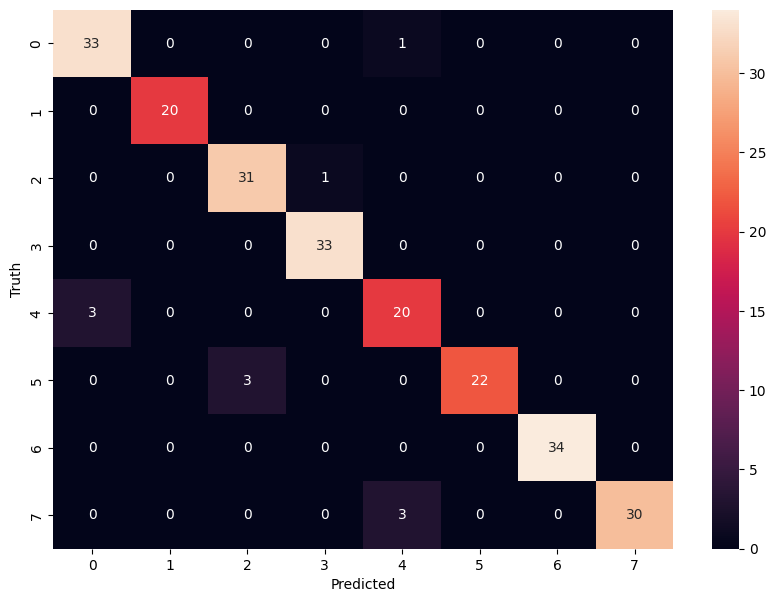

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [256]:
model.save("skin_detection.h5")